In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def normalizar_imagem(img):
    height, width = img.shape[:2]
    img_f = img.astype(float) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_f[l,c,0] = r/255
            img_f[l,c,1] = g/255
            img_f[l,c,2] = b/255
    return img_f

def desnormalizar_imagem(img):
    height, width = img.shape[:2]
    img_f = img.astype(int) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_f[l,c,0] = r*255 
            img_f[l,c,1] = g*255
            img_f[l,c,2] = b*255
    return img_f

def rgb_to_gray(img):
    height, width = img.shape[:2]
    img_f = img.astype(float) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
            img_f[l,c,0] = img_gray
            img_f[l,c,1] = img_gray
            img_f[l,c,2] = img_gray

    return img_f     

In [3]:
img = cv.imread('PoucoContraste.png')
img_f = normalizar_imagem(img)
cv.imshow('imagem',img_f)
cv.waitKey(0); cv.destroyAllWindows()

In [4]:
def brilho_contraste(img_original, beta, k):
    img = img_original.copy()
    height, width = img.shape[:2]
    numPixels = width * height
    r_ = 0
    g_ = 0
    b_ = 0
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            #print(f'({r}, {g}, {b})')
            r_ += r
            g_ += g
            b_ += b
    r_ /= numPixels
    g_ /= numPixels
    b_ /= numPixels
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            #print(f'({r}, {g}, {b})')
            img[l,c,0] = k*(r - r_) + r_ + beta
            img[l,c,1] =  k*(g - g_) + g_ + beta
            img[l,c,2] = k*(b - b_) + b_ + beta

    return img

In [5]:
img_f = normalizar_imagem(cv.imread('PoucoContraste.png'))
img = brilho_contraste(img_f, 0, 1)


In [6]:
cv.imshow('imagem',img)
cv.waitKey(0); cv.destroyAllWindows()

In [7]:
def histograma(img):
    # Considerando a imagem em preto-branco:
    y = []
    for i in range(256):
        pixels_r_i = np.sum(img[:,:,0] == i)
        y.append(pixels_r_i)
    return y

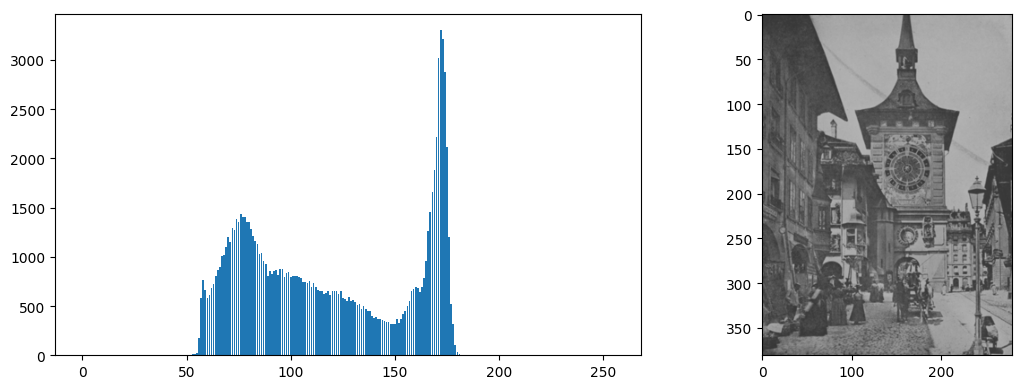

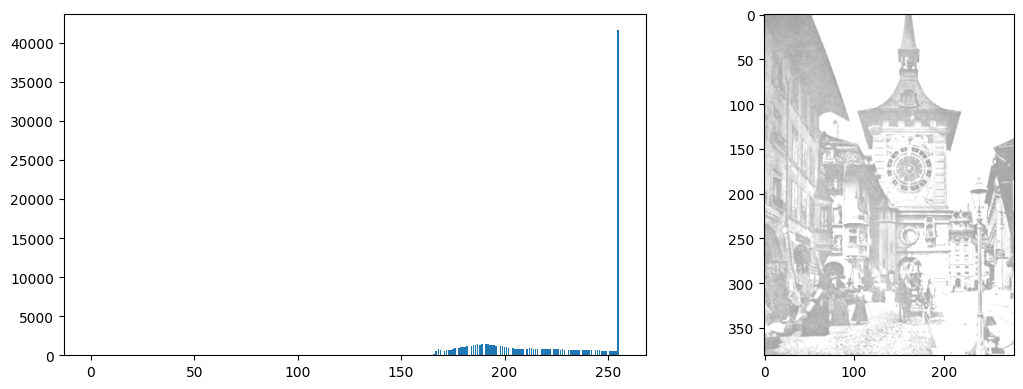

In [8]:
contraste = 1
brilho = 0
img2 = brilho_contraste(img_f, brilho, contraste)
y = histograma(desnormalizar_imagem(img2))
plt.figure(figsize=(12,4))
plt.subplot(121), plt.bar(range(256),y)
plt.subplot(122), plt.imshow(img2)
plt.tight_layout()
plt.show()

contraste = 300
brilho = 100
img3 = cv.convertScaleAbs(img, alpha=contraste, beta=brilho)
y = histograma(img3)
plt.figure(figsize=(12,4))
plt.subplot(121), plt.bar(range(256),y)
plt.subplot(122), plt.imshow(img3)
plt.tight_layout()
plt.show()


A função do opencv não é igual a criada por mim. Lá temos que o valor do pixel é alterado pela fórmula
$$
dst(I) = (|src(I)*alpha + beta|) mod(255)
$$

In [9]:
def filter(img, M):
    # Usando somente o canal vermelho:
    m, n = M.shape
    m_ = int(m/2)
    height, width = img.shape[:2]
    img_fiter = img.copy()
    for i in range(height):
        for j in range(width):
            if (j + m_ + 1 >= width or j - m_ <= 0 or i + m_ + 1 >= height or i - m_ < 0):
                continue
            for channel in range(3):
                I = img[i - m_: i + m_ + 1,j - m_: j + m_ + 1,channel]
                pixel_count = 0
                for i_ in range(m):
                    for j_ in range(n):
                        pixel_count += M[m - 1 - i_, n - 1 - j_] * I[i_, j_]
                img_fiter[i, j, channel] = pixel_count


    return img_fiter
            
            

In [12]:
sobel = np.array([
    [3, 0, -3],
    [10, 0, -10],
    [3, 0, -3],
])

edge_detection = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125, 0.25, 0.125],
    [0.0625, 0.125, 0.0625]
])


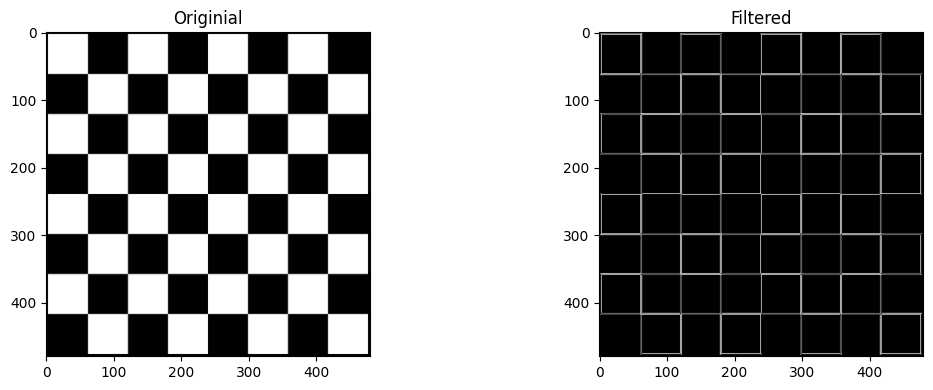

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2509803921568627..2.1803921568627445].


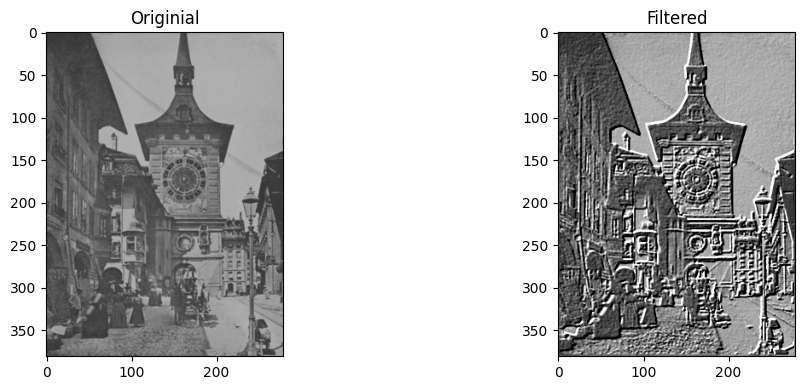

In [11]:
img_chess = cv.imread('Chess_Board.svg.png')
img_filtered = filter(img_chess, edge_detection )
plt.figure(figsize=(12,4))

plt.subplot(121), plt.imshow(img_chess), plt.title('Originial')
plt.subplot(122), plt.imshow(img_filtered), plt.title('Filtered')
plt.tight_layout()
plt.show()
img_filtered = filter(img, emboss )
plt.figure(figsize=(12,4))

plt.subplot(121), plt.imshow(img), plt.title('Originial')
plt.subplot(122), plt.imshow(img_filtered), plt.title('Filtered')
plt.tight_layout()
plt.show()